
# Analsis de sentimientos de la serie: Avatar; el ultimo maestro Aire
> Este proyecto fue decido hacer ya que se queria visualizar la evolucion de los personajes de la sire: "Avatar El ultimo maestro aire".
Por lo cual el objetivo era visualizar y saber los sentimientos de los personajes a lo largo de la serie, como inician, y se van desarrollando de una manera visual y no solo objetiva.
>
>Durante el proyecto se utilizo la metodologia Krisp Dm, la cual
 te deja iterar hacia algun paso anterior en caso de que tengas algo mal, quieras corregir o mejorar algo atras del punto en el que te encuentras.
Los pasos de la metodologia son:
1.-Entendimiento del problema: El cual en este caso es la visualizacion de la serie.
2.- Entendimiento de los datos: Y como es una serie sabemos que podria ser por medio de un guion o de audio, y entre estos dos es mucho mas facil trabjar con texto que con audio, pero que sea mas facil que el otro no quiere decir que no sera dificil.
3.-Preparacion d elos datos: para la preparacion d elos datos se puede llevar un proceso en el cual se aplican distintas cosas: como la eliminacion de vacio o igualarlos a 0 dependiendo de cual sirva mas, en este caso no tenia datos vacios ya que me encargue de eso desde la obtencion de los datos, los cuales sabemos que son de tipo string, por lo cual sabemos que en el lenguaje normal se usan caracteres para tomar pausas, referirinos a acciones(en el casi de los dialogos), y mas como comillas, guiones, puntos comas etc.
Asi que los eliminasmos con la libreria nlkt


Nuetro primer paso sera importar las librerias que usaremos, en este caso se opto por poner las librerias en la primera linea de codigo y en caso de agregar ahi mismo se agregara, no en otra, esto para tener un orden

In [28]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict
from random import shuffle
from sklearn.metrics import classification_report

#Graph and plots code
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import ast
#Libraris to work with emotions and text
import nltk
import string
import ast
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier

#Extensions of nltk library necesaries
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from itertools import combinations

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Vemos nuestros dtos para tener una nocion mas acertada acerca de que es lo que tenemos para trabajar

In [29]:
path = '/content/season_1.csv'
data = pd.read_csv(path, header=None, names=['Script'])
list(data)
data

,Script
0,Katara: [Narrating.] Water. Earth. Fire. Air. ...
1,Sokka: It's not getting away from me this time...
2,"Katara: [Happily surprised.] Sokka, look!"
3,Sokka: [Close-up of Sokka; whispering.] Sshh! ...
4,Katara: [Struggling with the water that passes...
...,...
3956,Zuko: I'm tired.
3957,Iroh: Then you should rest. A man needs his rest.
3958,"Katara: You too, Momo."
3959,Aang: Come here.


Eliminar los duplicados, ya que como es texto no debe haber ninguan fila igual

In [30]:
df = data.drop_duplicates()
df

,Script
0,Katara: [Narrating.] Water. Earth. Fire. Air. ...
1,Sokka: It's not getting away from me this time...
2,"Katara: [Happily surprised.] Sokka, look!"
3,Sokka: [Close-up of Sokka; whispering.] Sshh! ...
4,Katara: [Struggling with the water that passes...
...,...
3956,Zuko: I'm tired.
3957,Iroh: Then you should rest. A man needs his rest.
3958,"Katara: You too, Momo."
3959,Aang: Come here.


En este paso separamos nuestros personajes con nuestro dialogo, asi podremos aber que personaje dijo cada dialogo

In [31]:
# Split the 'Script' into 'Character' and 'Dialogue'
df[['Character', 'Dialogue']] = df['Script'].str.split(':', 1, expand=True)
df = df.drop(columns=['Script'])
df

<ipython-input-31-ba21fe56b4e2>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Character', 'Dialogue']] = df['Script'].str.split(':', 1, expand=True)
<ipython-input-31-ba21fe56b4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Character', 'Dialogue']] = df['Script'].str.split(':', 1, expand=True)
<ipython-input-31-ba21fe56b4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Character', 'Dialogue'

,Character,Dialogue
0,Katara,[Narrating.] Water. Earth. Fire. Air. My gran...
1,Sokka,It's not getting away from me this time. [Clo...
2,Katara,"[Happily surprised.] Sokka, look!"
3,Sokka,[Close-up of Sokka; whispering.] Sshh! Katara...
4,Katara,[Struggling with the water that passes right ...
...,...,...
3956,Zuko,I'm tired.
3957,Iroh,Then you should rest. A man needs his rest.
3958,Katara,"You too, Momo."
3959,Aang,Come here.


En una iteracion del modelo me di cuenta de que tenia personajes de relleno como 'Village boy', asi que queria ver todos los personaje spara depues quedarme con los dque de verdad son de mi interes

In [32]:
unique_characters = df['Character'].unique()
unique_characters

array(['Katara', 'Sokka', 'Zuko', 'Iroh', 'Aang', 'Kanna', 'Village girl',
       'Southern Water Tribe boy', 'Village boy', 'Village kids',
       'Southern Water Tribe girl', 'Firebender', 'Zhao', 'Soldier',
       'Gyatso', 'Aang and Sokka', 'Fire Sage', 'Oyaji', 'Suki',
       'Spectators', 'Little girl', 'Fisherman', 'Painter', 'Fangirls',
       'Koko', 'Little Girl', 'Gate guard', 'Cabbage merchant', 'Bumi',
       'Omashu captain', 'Chamberlain', 'Guard', 'Haru', "Haru's mother",
       'Tax collector', 'Old man', 'Warden', 'Tyro', 'Prisoner',
       'Captain', 'Kay-fon', 'Senlin Village leader',
       'Earthbender captain', 'Fire Nation Soldier', 'Engineer',
       'Great Fire Sage', 'Shyu', 'Roku', 'Oh', 'Pirate captain',
       'Pirate', 'Together', 'Eye-patch soldier', 'Jet',
       'Fire Nation soldier', 'Pipsqueak', 'The Duke', 'Smellerbee',
       'Old Fire Nation civilian', 'Gan Jin tribesman', 'Zhang leader',
       'Canyon guide', 'Gan Jin leader', 'Gan Jin Leader', 

En esta parte, despues de ver todos los demas personajes, y aunque personajes tuvieran un nombre caracteristico en vez del niño de la villa, no todos son importantes asi que busque los personajes con mas relevancia en la serie durante la temporada 1 y estos fueron

In [33]:
characters_of_interest = ['Aang', 'Katara', 'Sokka', 'Zuko', 'Iroh',
                          'Zhao', 'Jet', 'Ozai']# We are gonna use them in the future

En esta ocacion contamos los dialogos d elos personajes, es decir los que tienen un mayor protagonismo, sin embargo hay unos los cuales no tienen un valor protagonico en si pero aparecen en varios episodios asi que por eso aparecen mas que el antagonista "Ozai"

In [34]:
principalsCharacters = df['Character'].value_counts()
principalsCharacters.head(10)

Aang         818
Katara       634
Sokka        614
Zuko         173
Iroh         129
Zhao         107
Jet           74
Yue           51
Bumi          45
Mechanist     35
Name: Character, dtype: int64

In [35]:
characters_to_keep = ['Aang', 'Katara', 'Sokka','Zuko', 'Iroh', 'Azula', 'Zhao', 'Jet', 'Toph Beifong', 'Ozai', 'Ty Lee']
keepCharacteres =df[df['Character'].isin(characters_to_keep)]
KCDF=keepCharacteres
KCDF

,Character,Dialogue
0,Katara,[Narrating.] Water. Earth. Fire. Air. My gran...
1,Sokka,It's not getting away from me this time. [Clo...
2,Katara,"[Happily surprised.] Sokka, look!"
3,Sokka,[Close-up of Sokka; whispering.] Sshh! Katara...
4,Katara,[Struggling with the water that passes right ...
...,...,...
3956,Zuko,I'm tired.
3957,Iroh,Then you should rest. A man needs his rest.
3958,Katara,"You too, Momo."
3959,Aang,Come here.


Separamos los episodios, lo intente de 4 formas distintas y en cada era disitnto, apesar de que buscaba separarlos la mejor manera fue dividir la serie en 20 para asi tener "capitulos" del mismo largo

In [36]:
num_chapters = 20
dialogues_per_chapter = len(df) // num_chapters

# Assign chapters to each dialogue
df['Chapter'] = (df.index // dialogues_per_chapter) + 1

# Ensure that the last chapter includes all remaining dialogues
df['Chapter'] = df['Chapter'].clip(upper=num_chapters)
df

,Character,Dialogue,Chapter
0,Katara,[Narrating.] Water. Earth. Fire. Air. My gran...,1
1,Sokka,It's not getting away from me this time. [Clo...,1
2,Katara,"[Happily surprised.] Sokka, look!",1
3,Sokka,[Close-up of Sokka; whispering.] Sshh! Katara...,1
4,Katara,[Struggling with the water that passes right ...,1
...,...,...,...
3956,Zuko,I'm tired.,20
3957,Iroh,Then you should rest. A man needs his rest.,20
3958,Katara,"You too, Momo.",20
3959,Aang,Come here.,20


We have cleanead our data so we can beging with the lination of characters as "[]"

In [37]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens
df

,Character,Dialogue,Chapter
0,Katara,[Narrating.] Water. Earth. Fire. Air. My gran...,1
1,Sokka,It's not getting away from me this time. [Clo...,1
2,Katara,"[Happily surprised.] Sokka, look!",1
3,Sokka,[Close-up of Sokka; whispering.] Sshh! Katara...,1
4,Katara,[Struggling with the water that passes right ...,1
...,...,...,...
3956,Zuko,I'm tired.,20
3957,Iroh,Then you should rest. A man needs his rest.,20
3958,Katara,"You too, Momo.",20
3959,Aang,Come here.,20


Este comentario fue para tener ya listo nuestros datos d euna manera mas organizada y hecha para que trabjae con ellos, tenemos lasc columnas de character, dialogue, chapter y Processed_Dialogue, el cual es el dialogo pero  sin las palabras que sirven de conectores o simbolos de esritura tales como:"",[],(),.,?,!, etc

In [38]:
#df['Processed_Dialogue'] = df['Dialogue'].apply(preprocess_text)
#df.to_csv('processed_data.csv', index=False) #We are going to use this more avanced
#df            We used thic ode to clean our data and have it

Ahora leemos el archivo para poder trabjar con el

In [39]:
mydata = pd.read_csv('/content/processed_data.csv')

mydata

,Character,Dialogue,Chapter,Processed_Dialogue
0,Katara,[Narrating.] Water. Earth. Fire. Air. My gran...,1,"['narrating', 'water', 'earth', 'fire', 'air',..."
1,Sokka,It's not getting away from me this time. [Clo...,1,"['getting', 'away', 'time', 'closeup', 'sokka'..."
2,Katara,"[Happily surprised.] Sokka, look!",1,"['happily', 'surprised', 'sokka', 'look']"
3,Sokka,[Close-up of Sokka; whispering.] Sshh! Katara...,1,"['closeup', 'sokka', 'whispering', 'sshh', 'ka..."
4,Katara,[Struggling with the water that passes right ...,1,"['struggling', 'water', 'passes', 'right', 'fr..."
...,...,...,...,...
3488,Zuko,I'm tired.,20,"['im', 'tired']"
3489,Iroh,Then you should rest. A man needs his rest.,20,"['rest', 'man', 'needs', 'rest']"
3490,Katara,"You too, Momo.",20,['momo']
3491,Aang,Come here.,20,['come']


Vemos los dialogos de solo los personajes en los cuales tenemos importancia

In [40]:
df_filtered = mydata[mydata['Character'].isin(characters_of_interest)]
dialogue_counts = df_filtered['Character'].value_counts()
dialogue_counts

Aang      818
Katara    634
Sokka     614
Zuko      173
Iroh      129
Zhao      107
Jet        74
Ozai        4
Name: Character, dtype: int64

Contamos los dialogos por personajes de interes por el capitulo

In [41]:
dialogue_counts_by_chapter = df_filtered.groupby(['Chapter', 'Character']).size().reset_index(name='Dialogue_Count')
dialogue_counts_by_chapter

,Chapter,Character,Dialogue_Count
0,1,Aang,47
1,1,Iroh,7
2,1,Katara,51
3,1,Sokka,31
4,1,Zuko,8
...,...,...,...
88,20,Katara,89
89,20,Ozai,1
90,20,Sokka,108
91,20,Zhao,46


En esta linea de codigo las palabras vuelven a su base, es decir si estan conjugadas o en un verbo que termine con ing en el caso del Ingles, se vulven a su base, por ejemplo Narrating, tiene el ing, asi que se elimina y vuelve Narrat

In [42]:
stemmer = PorterStemmer()

def stem_dialogue(dialogue):
    words = word_tokenize(dialogue)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

mydata['Stemmed_Dialogue'] = mydata['Processed_Dialogue'].astype(str).apply(stem_dialogue)

print(mydata[['Processed_Dialogue', 'Stemmed_Dialogue']].head())

                                  Processed_Dialogue  \
0  ['narrating', 'water', 'earth', 'fire', 'air',...   
1  ['getting', 'away', 'time', 'closeup', 'sokka'...   
2          ['happily', 'surprised', 'sokka', 'look']   
3  ['closeup', 'sokka', 'whispering', 'sshh', 'ka...   
4  ['struggling', 'water', 'passes', 'right', 'fr...   

                                    Stemmed_Dialogue  
0  [ 'narrat ' , 'water ' , 'earth ' , 'fire ' , ...  
1  [ 'get ' , 'away ' , 'time ' , 'closeup ' , 's...  
2   [ 'happili ' , 'surpris ' , 'sokka ' , 'look ' ]  
3  [ 'closeup ' , 'sokka ' , 'whisper ' , 'sshh '...  
4  [ 'struggl ' , 'water ' , 'pass ' , 'right ' ,...  


Hacemos un analisis de sentimientos de todos los personajes a lo largo de la serie con una libreria ya pre entrenada y clasificamos los sentimientos en 3, positivos, negativos y neutrales, los cuales presentaran cada dialogo por su sentimiento

In [43]:
sia = SentimentIntensityAnalyzer()

def sentiment_score(dialogue):
    # Convert string representation of list back to list
    dialogue = ast.literal_eval(dialogue)
    # Join the tokens back to form a string
    dialogue_str = ' '.join(dialogue)
    return sia.polarity_scores(dialogue_str)

mydata['Sentiment'] = mydata['Processed_Dialogue'].apply(sentiment_score)
mydata

,Character,Dialogue,Chapter,Processed_Dialogue,Stemmed_Dialogue,Sentiment
0,Katara,[Narrating.] Water. Earth. Fire. Air. My gran...,1,"['narrating', 'water', 'earth', 'fire', 'air',...","[ 'narrat ' , 'water ' , 'earth ' , 'fire ' , ...","{'neg': 0.269, 'neu': 0.626, 'pos': 0.105, 'co..."
1,Sokka,It's not getting away from me this time. [Clo...,1,"['getting', 'away', 'time', 'closeup', 'sokka'...","[ 'get ' , 'away ' , 'time ' , 'closeup ' , 's...","{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp..."
2,Katara,"[Happily surprised.] Sokka, look!",1,"['happily', 'surprised', 'sokka', 'look']","[ 'happili ' , 'surpris ' , 'sokka ' , 'look ' ]","{'neg': 0.0, 'neu': 0.267, 'pos': 0.733, 'comp..."
3,Sokka,[Close-up of Sokka; whispering.] Sshh! Katara...,1,"['closeup', 'sokka', 'whispering', 'sshh', 'ka...","[ 'closeup ' , 'sokka ' , 'whisper ' , 'sshh '...","{'neg': 0.109, 'neu': 0.714, 'pos': 0.177, 'co..."
4,Katara,[Struggling with the water that passes right ...,1,"['struggling', 'water', 'passes', 'right', 'fr...","[ 'struggl ' , 'water ' , 'pass ' , 'right ' ,...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
...,...,...,...,...,...,...
3488,Zuko,I'm tired.,20,"['im', 'tired']","[ 'im ' , 'tire ' ]","{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'comp..."
3489,Iroh,Then you should rest. A man needs his rest.,20,"['rest', 'man', 'needs', 'rest']","[ 'rest ' , 'man ' , 'need ' , 'rest ' ]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3490,Katara,"You too, Momo.",20,['momo'],[ 'momo ' ],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3491,Aang,Come here.,20,['come'],[ 'come ' ],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


La libreria NLTK ya cuenta con un modelo ""

In [44]:
def calculate_sentiment_nltk(text):
    return sia.polarity_scores(text)['compound']

mydata['Sentiment'] = mydata['Dialogue'].astype(str).apply(calculate_sentiment_nltk)
overall_sentiment = mydata['Sentiment'].mean()
overall_sentiment

0.05658700257658174

Evalucion de modelo manualmente.
La evaluacion es una evaluacion cualitatica de las puntiaciones de sentimiento generado por el modelo VADER que es parte de la libreria NLKT, el unico problema es que no esntide muy bien la ironia, sin embargo hay  una ventaja de los datos, han sido guardados con los corchetes, los cuales reflejan los verdaderos sentimientos.
El codigo debajo tomara 10 dialogos aleatorios del capitulo que se elija, en este caso el 20 y los clasifica, de acuerdo a los entimientos, conforme mas cerca al 1 son sentimientos positivos, mas cerca del -1 son sentimientos negativos y mas cercano a 0 es mas neutro

In [45]:
chapter_evaluation = mydata[mydata['Chapter'] == 7]
sample_chapter_20 = chapter_evaluation.sample(10)
print(sample_chapter_20[['Dialogue', 'Sentiment']])

                                              Dialogue  Sentiment
674   The Earth Kingdom city of Omashu! [Camera pan...     0.7088
697                     [In old man voice.] Good idea!     0.4926
741           This is a prison cell? But it's so nice.     0.5823
651   [Frog view close-up.] Come out, Avatar! [Came...    -0.3107
733   [Accusingly.] You can't keep us here! Let us ...    -0.1984
608   [Confidently.] Katara, remember how Unagi alm...     0.0000
607   [Popping in; smiling broadly.] Hey Sokka! [So...     0.7494
676   [Close-up; overwhelmed.] They have buildings ...     0.0000
731   [Sits down again.] Now, what do you have to s...     0.4588
729   [Cut back to the king, who lazily stretches h...     0.4767


La evalucion manual se llevo acabo un par de veces para coraborar que si acertaba el modelo, y es tal cual la unica desventaja dice "No entiede bien el sarcasmo", durante la sere hay escenas sarcasticas de manera ppasico-agrasivas que no entiende bien, asi como viceversa, pero sin embargo al momento de encontrar la neutralidad y el psotivismo es correcto

En este codigo podemos ver los resultados de los sentimientos de los personajes en la temprada 1, hay per

In [46]:
character_sentiments = {}
for character in characters_of_interest:
    character_data = mydata[mydata['Character'] == character]
    character_sentiment = character_data['Sentiment'].mean() if not character_data.empty else None
    character_sentiments[character] = character_sentiment

character_sentiments

{'Aang': 0.09539339853300734,
 'Katara': 0.044341640378548895,
 'Sokka': 0.03706986970684039,
 'Zuko': -0.0076589595375722505,
 'Iroh': 0.08879224806201551,
 'Zhao': -0.0651177570093458,
 'Jet': 0.024363513513513516,
 'Ozai': -0.08292500000000001}

Es una Grafica que muestra los sentimientos de los personajes principales, asi podemos entender si son mas neutros, positivos o negativos

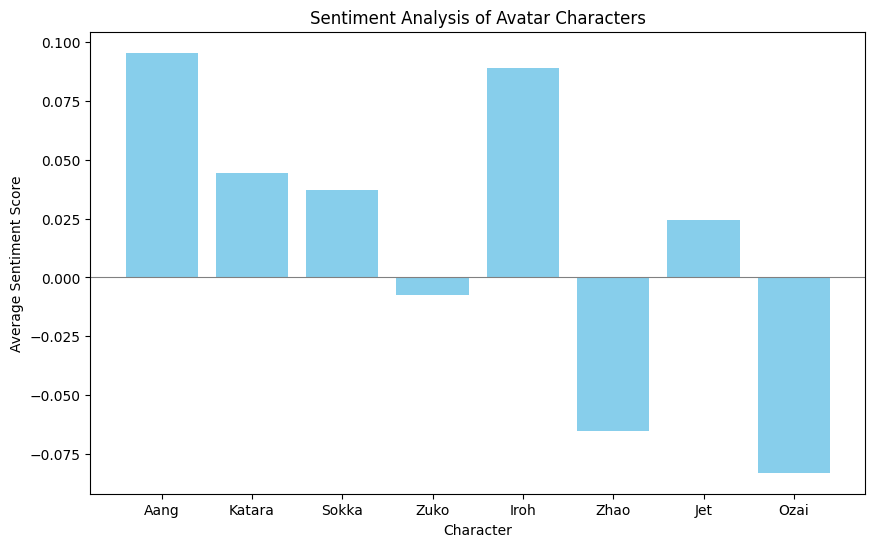

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(character_sentiments.keys(), character_sentiments.values(), color='skyblue')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis of Avatar Characters')
plt.axhline(0, color='gray', linewidth=0.8)
plt.show()

En la siguiente grafica se muestra como se comportaban los personajes en los dialogos que tuvieron, Si tuvieron X numero de dialogos muestra como fueron sus sentimienos en esos dialogos

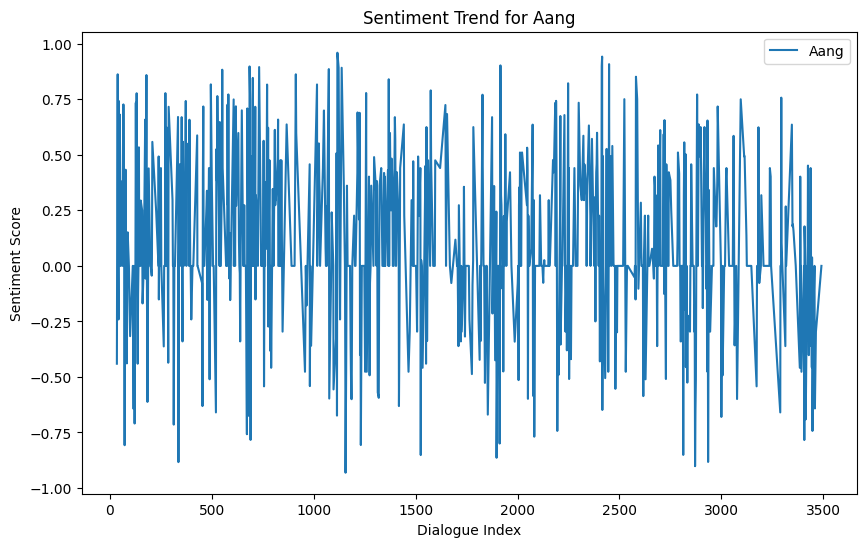

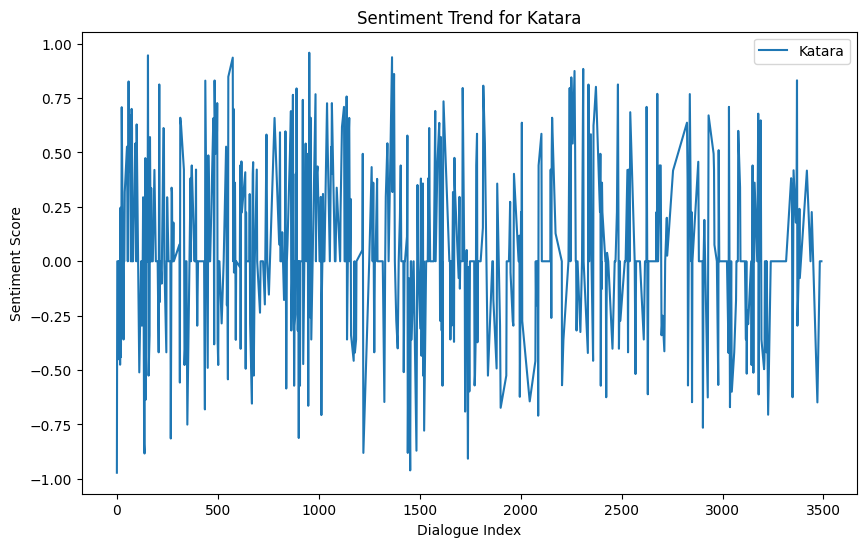

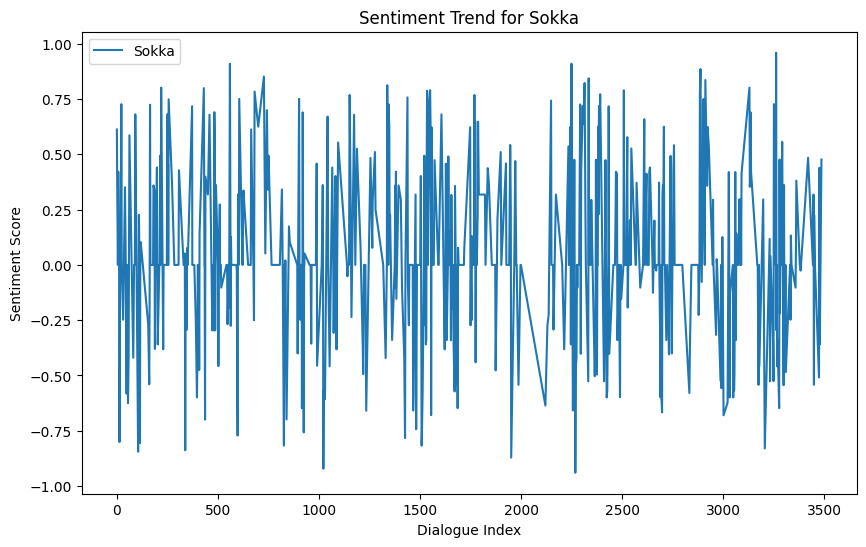

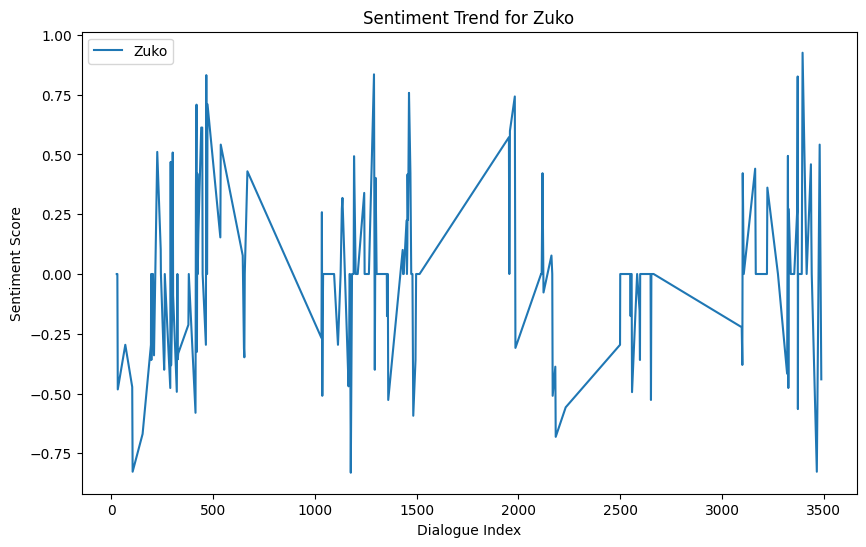

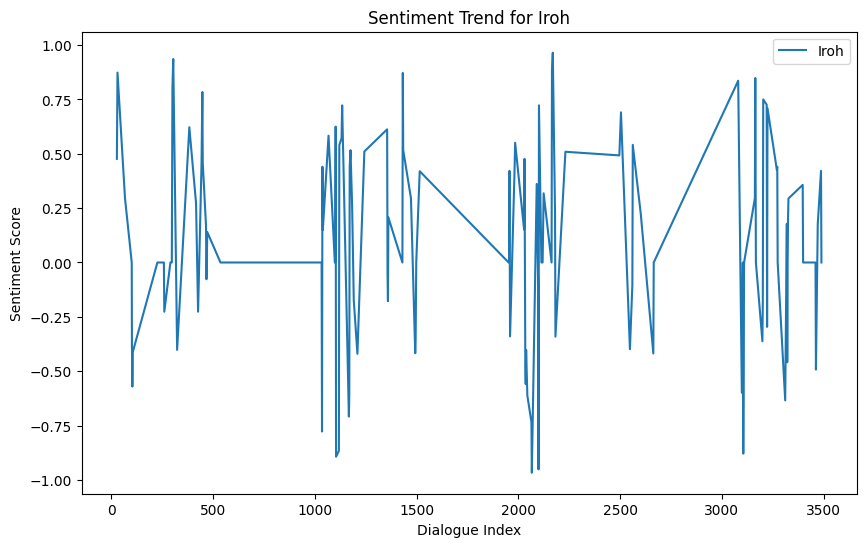

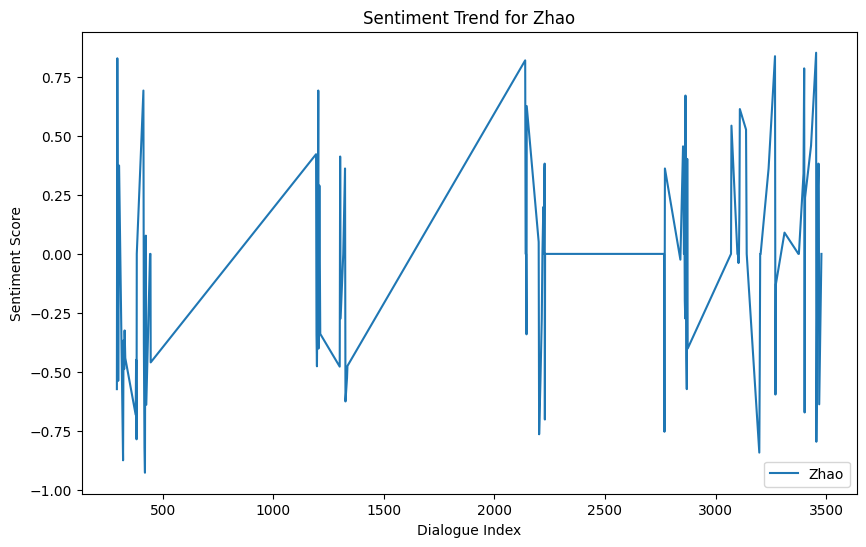

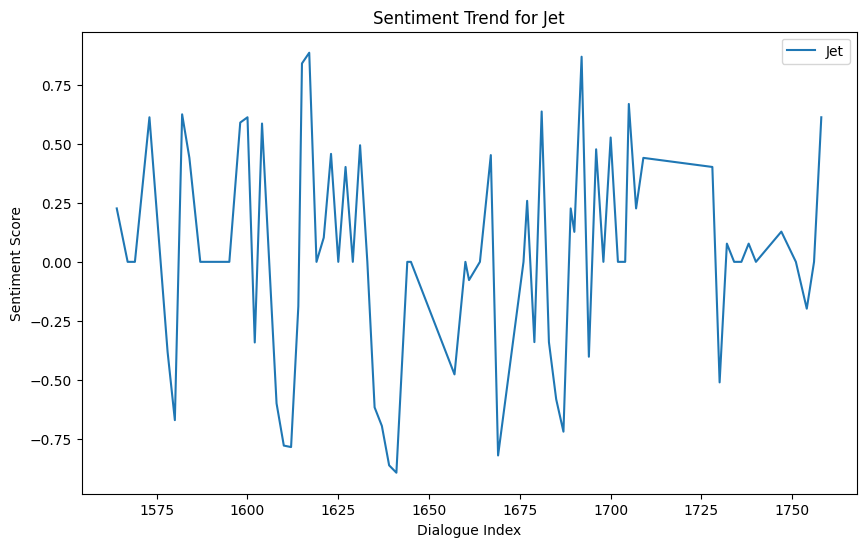

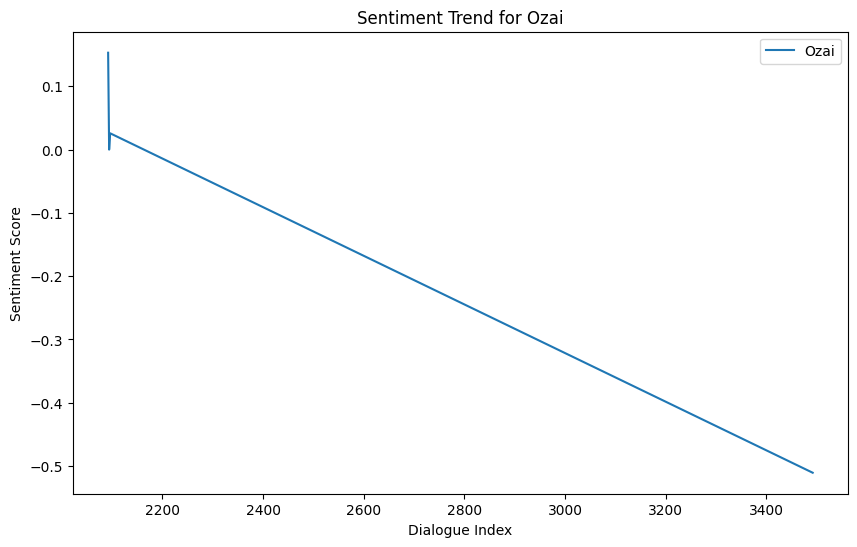

In [48]:
for character in characters_of_interest:
    character_data = mydata[mydata['Character'] == character]
    plt.figure(figsize=(10, 6))
    plt.plot(character_data['Sentiment'], label=character)
    plt.title(f'Sentiment Trend for {character}')
    plt.xlabel('Dialogue Index')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.show()

Cuenta los dialogos de los perosanjes en la serie por los episodios

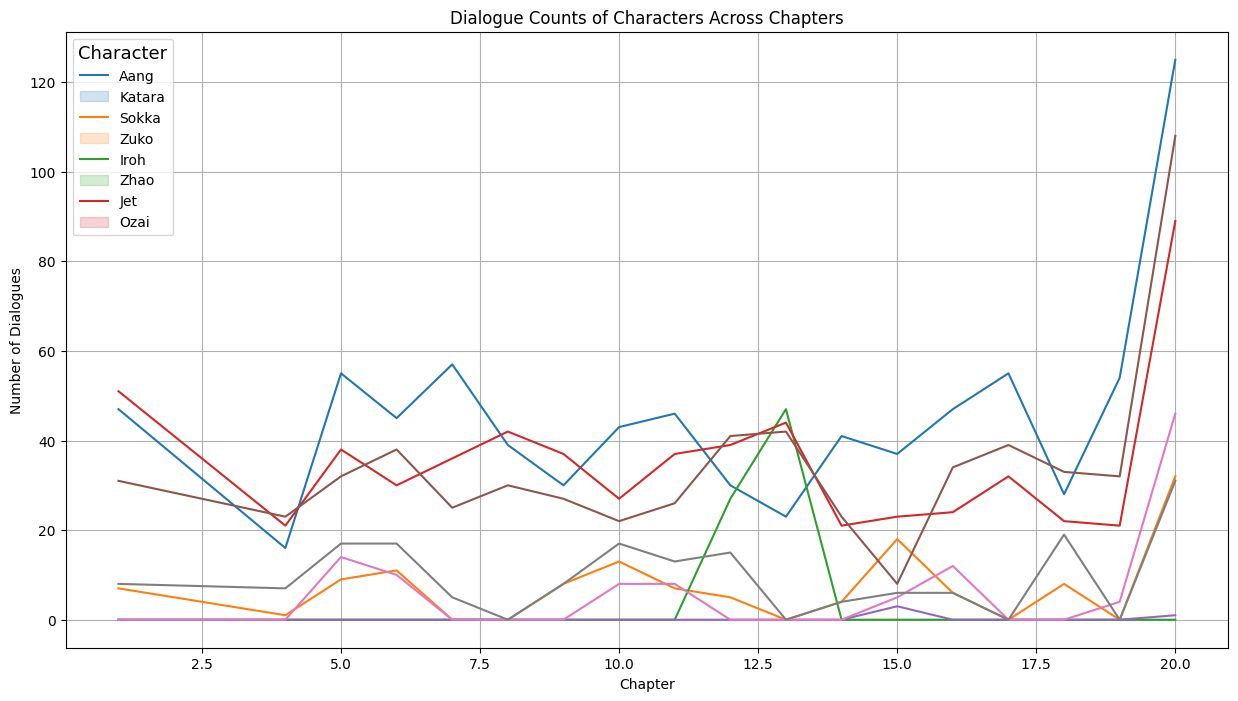

In [54]:
dialogue_counts_by_chapter = df_filtered.groupby(['Chapter', 'Character']).size().reset_index(name='Dialogue_Count')

# Pivot the data for visualization
pivot_dialogues_count = dialogue_counts_by_chapter.pivot(index='Chapter', columns='Character', values='Dialogue_Count').fillna(0)

# Plotting the dialogue counts
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_dialogues_count, dashes=False)
plt.title('Dialogue Counts of Characters Across Chapters')
plt.xlabel('Chapter')
plt.ylabel('Number of Dialogues')
plt.legend(title='Character', title_fontsize='13', loc='upper left', labels=characters_of_interest)
plt.grid(True)
plt.show()

Esta es una grafica de la tendencia de sentimientos a lo largo de la temporada 1

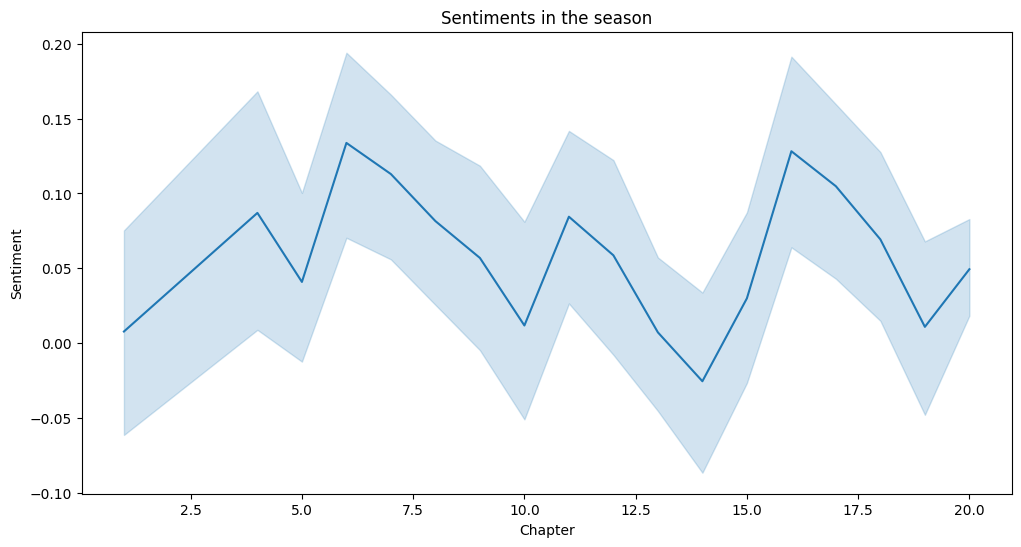

In [50]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Chapter', y='Sentiment', data=mydata)
plt.title('Sentiments in the season')
plt.xlabel('Chapter')
plt.ylabel('Sentiment')
plt.show()

Sentimientos por episodio como se comportan

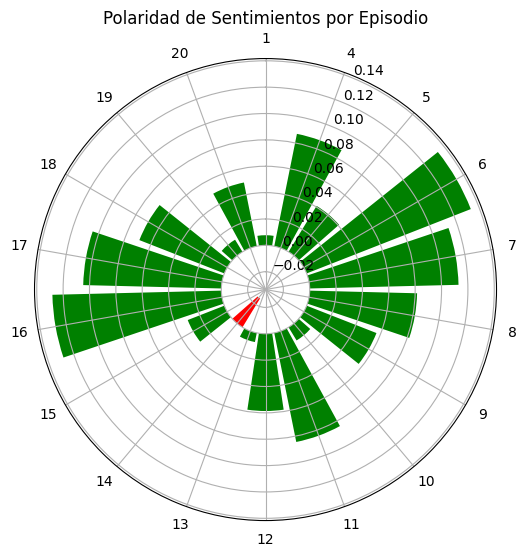

In [52]:
# Calcula el promedio de sentimiento para cada episodio
average_sentiments = mydata.groupby('Chapter')['Sentiment'].mean()

# Preparando los datos para el gráfico
chapters = average_sentiments.index
sentiments = average_sentiments.values

# Definiendo colores basados en la polaridad del sentimiento
colors = ['green' if s > 0 else 'red' if s < 0 else 'gray' for s in sentiments]


theta = np.linspace(0, 2 * np.pi, len(chapters), endpoint=False)

plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, sentiments, width=0.3, color=colors)

plt.title('Polaridad de Sentimientos por Episodio')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)       # Los episodios aumentan en el sentido de las agujas del reloj


ax.set_xticks(theta)
ax.set_xticklabels(chapters)

plt.show()